<a href="https://colab.research.google.com/github/MinjuKim0217/Python-Machine-Learning-Book/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B5%90%EA%B3%BC%EC%84%9C_13%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신 러닝 교과서 3판

# 13장 - 텐서플로를 사용한 신경망 훈련 (1/2)

**아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/python-machine-learning-book-3rd-edition/blob/master/ch13/ch13_part1.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/python-machine-learning-book-3rd-edition/blob/master/ch13/ch13_part1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

### 목차

- 텐서플로와 훈련 성능
  - 성능 문제
  - 텐서플로란?
  - 텐서플로 학습 순서
- 텐서플로 처음 시작하기
  - 텐서플로 설치
  - 텐서플로에서 텐서 만들기
  - 텐서의 데이터 타입과 크기 조작하기
  - 텐서에 수학 연산 적용하기
  - split(), stack(), concatenate() 함수
- 텐서플로 데이터셋 API(tf.data)를 사용하여 입력 파이프라인 구축하기
  - 텐서에서 텐서플로 데이터셋 만들기
  - 두 개의 텐서를 하나의 데이터셋으로 연결하기
  - shuffle(), batch(), repeat() 메서드
  - 로컬 디스크에 있는 파일에서 데이터셋 만들기
  - `tensorflow_datasets` 라이브러리에서 데이터셋 로드하기

In [1]:
from IPython.display import Image

## 텐서플로와 훈련 성능

### 성능 문제

사이킷런의 많은 함수는 여러 프로세스로 연산을 분산 시킬 수 있다. 

그러나 파이썬은 GIL 때문에 하나의 코어만 활용 가능 

- GIL:  파이썬의 기본 C구현인 CPython은 하나릐 프로세스에 여러 개의 스레드가 있더라도 하나의 스레드만 실행 시킨다. 이를 GIL이라 하며 C 확장 모듈의 복잡도를 낮추고 스레드 안전을 보장한다.
- 멀티 코어의 이점을 우리지 못하지만 단일 스레드의 성능은 높다. 



In [2]:
Image(url='https://git.io/JL5iw', width=800)

GIL 문제 때문에 많은 장점이 있는 GPU를 사용하게 되었다-> 최신 CPU 가격의 70%정도로 코어 개수가 290배나 많고 초당 부동소수점 연산을 10배나 많이 할 수 있다. 

그러나 GPU를 구동할려면 CUDA나 OpenCL 패키지를 사용해야 하지만 머신러닝 작업에 최적화 되어 있지 않다. 

**그래서 텐서플로를 사용하겠다,**

### 텐서플로란?

In [3]:
Image(url='https://git.io/JL5io', width=500)

텐서플로는 일련의 노드로 구성된 계산 그래프를 만든다. 

각 노드는 0개 이상의 입력이나 출력을 가질 수 있는 연산을 표현한다. 

이런 연산의 입력과 출력을 참조하기 위한 심벌릭 핸들로 텐서가 만들어진다. 

**텐서플로에서 실제값은 넘파이 배열로 저장되고 텐서는 이 배열에 대한 참고를 제공.**


### 텐서플로 학습 순서

## 텐서플로 처음 시작하기

### 텐서플로 설치

In [4]:
#! pip install tensorflow

In [5]:
import tensorflow as tf
print('텐서플로 버전:', tf.__version__)
import numpy as np

np.set_printoptions(precision=3)

텐서플로 버전: 2.8.2


In [6]:
! python -c 'import tensorflow as tf; print(tf.__version__)'

2.8.2


### 텐서플로에서 텐서 만들기

In [7]:
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]

t_a = tf.convert_to_tensor(a) 
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [8]:
tf.is_tensor(a), tf.is_tensor(t_a)

(False, True)

In [9]:
t_ones = tf.ones((2, 3))

t_ones.shape

TensorShape([2, 3])

In [10]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [11]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)

print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


`tf.convert_to_tensor` 함수는 `tf.constant` 함수와 다르게 (잠시 후에 설명할) `tf.Variable` 객체도 입력받을 수 있습니다. 이외에도 `tf.fill` 함수와 `tf.one_hot` 함수를 사용하여 텐서를 만들 수 있습니다.

`tf.fill` 함수는 원하는 스칼라 값으로 채워진 텐서를 만듭니다. 첫 번째 매개변수에는 `tf.ones` 함수처럼 텐서의 크기를 전달합니다. 두 번째 매개변수에 채우고자 하는 스칼라 값을 전달합니다. 예를 들어 다음처럼 쓰면 `tf.ones((2, 3))`과 같은 결과를 얻을 수 있습니다.

In [12]:
tf.fill((2, 3), 1)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)>

큰 사이즈의 텐서를 만들 때 `tf.fill` 함수가 `tf.ones` 보다 효율적입니다.

`tf.one_hot` 함수는 원-핫 인코딩 행렬을 만들어 주는 편리한 함수입니다. 첫 번째 매개변수에 원-핫 인코딩 위치를 나타내는 인덱스를 전달하고 두 번째 매개변수에는 원-핫 인코딩 벡터의 길이를 전달합니다. 만들어진 행렬의 크기는 (첫 번째 매개변수의 길이 $\times$ 두 번째 매개변수)가 됩니다. 예를 들어 다음과 같은 코드는 (3 $\times$ 4) 크기의 원-핫 인코딩 행렬을 만듭니다. 

In [13]:
tf.one_hot([0, 1, 2], 4)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)>

텐서플로 2.4 버전부터 `tf.experimental.numpy` 모듈 아래에서 넘파이 호환 API를 제공합니다. 이 API는 넘파이 1.16 버전을 기반으로 하며 향후 버전에서 바뀔 수 있습니다. 전체 API 목록은 https://www.tensorflow.org/api_docs/python/tf/experimental/numpy를 참고하세요. 텐서플로 넘파이 API에 대한 설명은 https://www.tensorflow.org/guide/tf_numpy를 참고하세요.

### 텐서의 데이터 타입과 크기 조작하기

In [14]:
t_a_new = tf.cast(t_a, tf.int64)

print(t_a_new.dtype)

<dtype: 'int64'>


tf.cast() 함수는 텐서의 데이터 타입을 원하는 타입으로 변환


In [15]:
t = tf.random.uniform(shape=(3, 5))

t_tr = tf.transpose(t)
print(t.shape, ' --> ', t_tr.shape)

(3, 5)  -->  (5, 3)


텐서 전치하기

In [70]:
t = tf.zeros((30,))

t_reshape = tf.reshape(t, shape=(5, 6))

print(t_reshape.shape)

tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.], shape=(30,), dtype=float32)
(5, 6)


텐서 크기 바꾸기 (1D->2D)

In [71]:
t = tf.zeros((1, 2, 1, 4, 1))

t_sqz = tf.squeeze(t, axis=(2, 4))
print(t)
print(t.shape, ' --> ', t_sqz.shape)

tf.Tensor(
[[[[[0.]
    [0.]
    [0.]
    [0.]]]


  [[[0.]
    [0.]
    [0.]
    [0.]]]]], shape=(1, 2, 1, 4, 1), dtype=float32)
(1, 2, 1, 4, 1)  -->  (1, 2, 4)


불필요한 텐서 삭제하기 (크기가 1인 차원은 불필요하다)

### 텐서에 수학 연산 적용하기

In [18]:
tf.random.set_seed(1)

t1 = tf.random.uniform(shape=(5, 2), 
                       minval=-1.0,
                       maxval=1.0)

t2 = tf.random.normal(shape=(5, 2), 
                      mean=0.0,
                      stddev=1.0)

In [19]:
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


In [20]:
t4 = tf.math.reduce_mean(t1, axis=0)

print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


In [21]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)

print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


In [22]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)

print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


In [23]:
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()

print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


In [24]:
np.sqrt(np.sum(np.square(t1), axis=1))

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

넘파이 함수들은 입력 매개변수를 처리하기 전에 해당 객체의 `__array__()` 메서드를 호출합니다. 이를 통해 넘파이 호환성을 가진 객체를 만들 수 있습니다. 예를 들면 판다스의 `Series` 객체를 넘파이 API에 사용할 수 있습니다. 마찬가지로 텐서에도 이 메서드가 구현되어 있기 때문에 넘파이 함수에 텐서를 입력으로 사용할 수 있습니다.

많은 수학 함수는 최상위 수준에서 참조가 가능합니다. 예를 들면 `tf.multiply()`, `tf.reduce_mean()`, `tf.reduce_sum()`, `tf.matmul()`처럼 사용할 수 있습니다. 파이썬 3.5 버전부터는 @ 연산자를 사용하여 행렬 연산을 수행할 수 있습니다. 예를 들면 다음 계산은 위와 동일한 결과를 만듭니다.

In [25]:
t1 @ tf.transpose(t2)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-1.144,  1.115, -0.87 , -0.321,  0.856],
       [ 0.248, -0.191,  0.25 , -0.064, -0.331],
       [-0.478,  0.407, -0.436,  0.022,  0.527],
       [ 0.525, -0.234,  0.741, -0.593, -1.194],
       [-0.099,  0.26 ,  0.125, -0.462, -0.396]], dtype=float32)>

텐서플로 2.4 버전부터 `tf.experimental.numpy` 모듈 아래에서 넘파이 호환 API를 제공합니다. 이 API는 넘파이 1.16 버전을 기반으로 하며 향후 버전에서 바뀔 수 있습니다. 전체 API 목록은 https://www.tensorflow.org/api_docs/python/tf/experimental/numpy를 참고하세요. 텐서플로 넘파이 API에 대한 설명은 https://www.tensorflow.org/guide/tf_numpy를 참고하세요. 텐서플로 넘파이 API를 사용하면 행렬 곱셈을 더 간단히 계산할 수 있습니다.

In [26]:
import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()

tn1 = tnp.array(t1)
tn2 = tnp.array(t2)

print(tnp.dot(tn1, tn2.T))

tf.Tensor(
[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]], shape=(5, 5), dtype=float32)


텐서플로의 전체 수학 함수는 https://www.tensorflow.org/api_docs/python/tf/math를 참조하세요. 선형 대수 함수는 https://www.tensorflow.org/api_docs/python/tf/linalg에서 볼 수 있습니다.

### split(), stack(), concatenate() 함수

In [27]:
tf.random.set_seed(1)

t = tf.random.uniform((6,))

print(t.numpy())

t_splits = tf.split(t, 3)

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292 0.643]


[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

분할 개수 정하기

In [28]:
tf.random.set_seed(1)
t = tf.random.uniform((5,))

print(t.numpy())

t_splits = tf.split(t, num_or_size_splits=[3, 2])

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292]


[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

다른 분할 크기 전달하기

In [29]:
A = tf.ones((3,))
B = tf.zeros((2,))

C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


두 텐서 연결하기

In [30]:
A = tf.ones((3,))
B = tf.zeros((3,))

S = tf.stack([A, B], axis=1)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]


텐서 A와 B의 크기가 모두 3이라면 두 텐서를 쌓아 2D 텐서 S를 만들 수 있다.

## 텐서플로 데이터셋 API(tf.data)를 사용하여 입력 파이프라인 구축하기

### 텐서에서 텐서플로 데이터셋 만들기

In [31]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]

ds = tf.data.Dataset.from_tensor_slices(a)

print(ds)

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>


In [32]:
for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [33]:
ds_batch = ds.batch(3)

for i, elem in enumerate(ds_batch, 100):
    print('batch {}:'.format(i), elem.numpy())

batch 100: [1.2 3.4 7.5]
batch 101: [4.1 5.  1. ]


### 두 개의 텐서를 하나의 데이터셋으로 연결하기

In [34]:
tf.random.set_seed(1)

t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

In [35]:
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)
    
ds_joint = tf.data.Dataset.zip((ds_x, ds_y))

for example in ds_joint:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3


In [36]:
## 방법 2:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))

for example in ds_joint:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3


In [37]:
ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))

for example in ds_trans:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [-0.67   0.803  0.262]   y:  0
  x:  [-0.131 -0.416  0.285]   y:  1
  x:  [ 0.952 -0.13   0.32 ]   y:  2
  x:  [0.21  0.273 0.229]   y:  3


먼저 두 개의 데이터셋 ds_x와 ds_y를 만든다.

그 다음 zip 함수를 사용하여 두 데이터셋을 연결한 데이터셋을 만든다. 

또는 tf.data.Dataset.from_tensor_slices() 함수로 텐서를 바로 연결하여 데이터셋을 만들 수 있다. 


### shuffle(), batch(), repeat() 메서드

확률젇 경사 하강법 최적화 방식으로 신경망 모델을 훈련하려면 훈련 데이터를 무작위로 섞은 배치로 만들어 주입하는 것이 중요하다. 

배치를 만드는 것 외에도 데이터셋을 섞거나 재순환하는 방법을 알아보자.

In [38]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))

for example in ds:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.605 0.637 0.614]   y:  3


In [39]:
ds = ds_joint.batch(batch_size=3,
                    drop_remainder=False)

batch_x, batch_y = next(iter(ds))

print('배치 x: \n', batch_x.numpy())

print('배치 y:   ', batch_y.numpy())

배치 x: 
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]
배치 y:    [0 1 2]


In [40]:
ds = ds_joint.batch(3).repeat(count=2)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [41]:
ds = ds_joint.repeat(count=2).batch(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


In [42]:
tf.random.set_seed(1)

## 순서 1: shuffle -> batch -> repeat
ds = ds_joint.shuffle(4).batch(2).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [43]:
tf.random.set_seed(1)

## 순서 1: shuffle -> batch -> repeat
ds = ds_joint.shuffle(4).batch(2).repeat(20)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]
6 (2, 3) [1 3]
7 (2, 3) [2 0]
8 (2, 3) [1 2]
9 (2, 3) [3 0]
10 (2, 3) [3 0]
11 (2, 3) [2 1]
12 (2, 3) [3 0]
13 (2, 3) [1 2]
14 (2, 3) [3 0]
15 (2, 3) [2 1]
16 (2, 3) [2 3]
17 (2, 3) [0 1]
18 (2, 3) [1 2]
19 (2, 3) [0 3]
20 (2, 3) [0 1]
21 (2, 3) [2 3]
22 (2, 3) [3 2]
23 (2, 3) [0 1]
24 (2, 3) [3 0]
25 (2, 3) [1 2]
26 (2, 3) [1 3]
27 (2, 3) [2 0]
28 (2, 3) [2 1]
29 (2, 3) [0 3]
30 (2, 3) [2 3]
31 (2, 3) [0 1]
32 (2, 3) [3 1]
33 (2, 3) [2 0]
34 (2, 3) [3 2]
35 (2, 3) [1 0]
36 (2, 3) [3 0]
37 (2, 3) [2 1]
38 (2, 3) [0 2]
39 (2, 3) [3 1]


In [44]:
tf.random.set_seed(1)

## 순서 2: batch -> shuffle -> repeat
ds = ds_joint.batch(2).shuffle(4).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


In [45]:
tf.random.set_seed(1)

## 순서 2: batch -> shuffle -> repeat
ds = ds_joint.batch(2).shuffle(4).repeat(20)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]
6 (2, 3) [2 3]
7 (2, 3) [0 1]
8 (2, 3) [2 3]
9 (2, 3) [0 1]
10 (2, 3) [2 3]
11 (2, 3) [0 1]
12 (2, 3) [2 3]
13 (2, 3) [0 1]
14 (2, 3) [2 3]
15 (2, 3) [0 1]
16 (2, 3) [0 1]
17 (2, 3) [2 3]
18 (2, 3) [2 3]
19 (2, 3) [0 1]
20 (2, 3) [0 1]
21 (2, 3) [2 3]
22 (2, 3) [2 3]
23 (2, 3) [0 1]
24 (2, 3) [2 3]
25 (2, 3) [0 1]
26 (2, 3) [2 3]
27 (2, 3) [0 1]
28 (2, 3) [0 1]
29 (2, 3) [2 3]
30 (2, 3) [0 1]
31 (2, 3) [2 3]
32 (2, 3) [2 3]
33 (2, 3) [0 1]
34 (2, 3) [2 3]
35 (2, 3) [0 1]
36 (2, 3) [2 3]
37 (2, 3) [0 1]
38 (2, 3) [0 1]
39 (2, 3) [2 3]


In [46]:
tf.random.set_seed(1)

## 순서 3: batch -> repeat -> shuffle
ds = ds_joint.batch(2).repeat(3).shuffle(4)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [0 1]
2 (2, 3) [2 3]
3 (2, 3) [2 3]
4 (2, 3) [0 1]
5 (2, 3) [2 3]


### 로컬 디스크에 있는 파일에서 데이터셋 만들기

In [72]:
# 코랩에서 실행하는 경우에는 다음 코드를 실행하여 이미지를 다운로드받으세요.
!mkdir cat_dog_images
!wget https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/cat-01.jpg
!wget https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/cat-02.jpg
!wget https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/cat-03.jpg
!wget https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/dog-01.jpg
!wget https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/dog-02.jpg
!wget https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/dog-03.jpg
!mv *.jpg cat_dog_images/

mkdir: cannot create directory ‘cat_dog_images’: File exists
--2022-06-13 11:49:49--  https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/cat-01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139707 (136K) [image/jpeg]
Saving to: ‘cat-01.jpg’

cat-01.jpg          100%[===================>] 136.43K  --.-KB/s    in 0.03s   

2022-06-13 11:49:49 (5.13 MB/s) - ‘cat-01.jpg’ saved [139707/139707]

--2022-06-13 11:49:50--  https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch13/cat_dog_images/cat-02.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.

In [48]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


이미지 크기:  (900, 1200, 3)
이미지 크기:  (900, 1200, 3)
이미지 크기:  (900, 742, 3)
이미지 크기:  (800, 1200, 3)
이미지 크기:  (800, 1200, 3)
이미지 크기:  (900, 1200, 3)


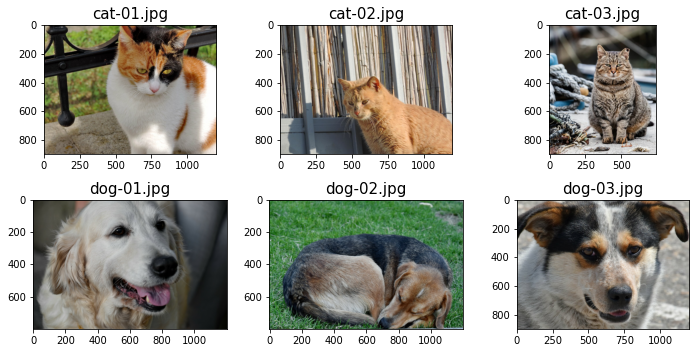

In [74]:
import matplotlib.pyplot as plt
import os


fig = plt.figure(figsize=(10, 5))
for i,file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('이미지 크기: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    #ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
# plt.savefig('images/13_1.png', dpi=300)
plt.tight_layout()
plt.show()

In [50]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [51]:
ds_files_labels = tf.data.Dataset.from_tensor_slices(
    (file_list, labels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'cat_dog_images/cat-01.jpg' 0
b'cat_dog_images/cat-02.jpg' 0
b'cat_dog_images/cat-03.jpg' 0
b'cat_dog_images/dog-01.jpg' 1
b'cat_dog_images/dog-02.jpg' 1
b'cat_dog_images/dog-03.jpg' 1


(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 1
(80, 120, 3) 1
(80, 120, 3) 1


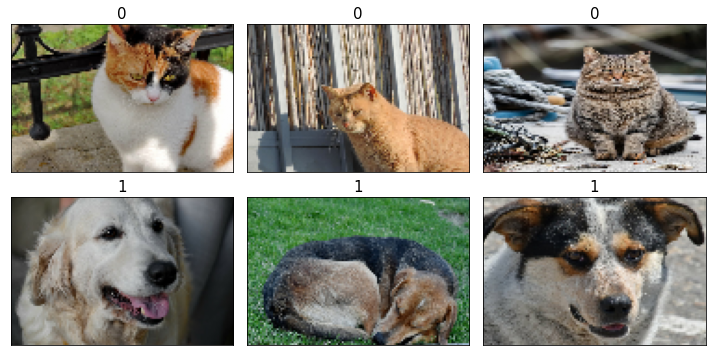

In [52]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0

    return image, label

img_width, img_height = 120, 80

ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))
for i,example in enumerate(ds_images_labels):
    print(example[0].shape, example[1].numpy())
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), 
                 size=15)
    
plt.tight_layout()
# plt.savefig('images/13_2.png', dpi=300)
plt.show()

load+and_preprocess() 함수는 네 개의 단계를 하나의 함수에 넣었다. 원본 이미지를 로드하고 디코딩한 후 이미지 크기를 변경한다. 

그 다음 이전 절에서 배웠던 연산을 적용하고 순환시킬수 있는 데이터셋을 반환한다. 

### `tensorflow_datasets` 라이브러리에서 데이터셋 로드하기

코랩에는 이미 `tensorflow-datasets` 라이브러리가 설치되어 있지만 최신 버전으로 업그레이드해주세요. 설치 후에는 커널(또는 코랩 런타임)을 재시작해야합니다.

In [53]:
!pip install --upgrade tensorflow-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 4.1 MB/s 
     |████████████████████████████████| 98 kB 8.0 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [54]:
import tensorflow_datasets as tfds

print(len(tfds.list_builders()))
print(tfds.list_builders()[:5])

1085
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


In [55]:
## 다음 명령을 실행하면 전체 리스트를 얻을 수 있습니다
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'criteo',
 'cs_restaurants',
 'cura

CelebA 데이터셋 다운로드하기

In [56]:
celeba_bldr = tfds.builder('celeb_a')

print(celeba_bldr.info.features)
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features.keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['image'])
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['attributes'].keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.citation)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

In [57]:
# 아래 셀에서 CelebA 데이터를 다운로드할 때 에러가 발생하면 https://git.io/JL5GM 에서 
# 4개의 파일을 수동으로 받아 ~/tensorflow_datasets/downloads/manual로 복사하세요.
# 또는 https://drive.google.com/u/0/uc?export=download&confirm=W-9Y&id=1tCj_CKUgjtThk1fiL0wP0WiuYxk4dvjT
# 에서 수동으로 다운로드하여 사용하세요.

# 코랩을 사용하는 경우 구글 드라이브에 업로드한 뒤 아래 코드를 실행하고 파일을 복사하세요.
# 여기서는 구글 드라이브 datasets/celeba 폴더에 파일이 있다고 가정합니다.
from google.colab import drive
drive.mount('/drive')
!mkdir -p ~/tensorflow_datasets/downloads/manual
!cp /drive/MyDrive/datasets/celeba/img_align_celeba.zip ~/tensorflow_datasets/downloads/manual
!cp /drive/MyDrive/datasets/celeba/list_attr_celeba.txt ~/tensorflow_datasets/downloads/manual
!cp /drive/MyDrive/datasets/celeba/list_eval_partition.txt ~/tensorflow_datasets/downloads/manual
!cp /drive/MyDrive/datasets/celeba/list_landmarks_align_celeba.txt ~/tensorflow_datasets/downloads/manual

Mounted at /drive
cp: cannot stat '/drive/MyDrive/datasets/celeba/img_align_celeba.zip': No such file or directory
cp: cannot stat '/drive/MyDrive/datasets/celeba/list_attr_celeba.txt': No such file or directory
cp: cannot stat '/drive/MyDrive/datasets/celeba/list_eval_partition.txt': No such file or directory
cp: cannot stat '/drive/MyDrive/datasets/celeba/list_landmarks_align_celeba.txt': No such file or directory


In [58]:
# 데이터 다운로드하고 디스크에 저장합니다
celeba_bldr.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/162770 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/celeb_a/2.0.1.incompleteB3L3PC/celeb_a-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/19867 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/celeb_a/2.0.1.incompleteB3L3PC/celeb_a-validation.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/19962 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/celeb_a/2.0.1.incompleteB3L3PC/celeb_a-test.tfrecord*...:   0%|          | 0/1…

Dataset celeb_a downloaded and prepared to ~/tensorflow_datasets/celeb_a/2.0.1. Subsequent calls will reuse this data.


In [59]:
# 디스크에서 tf.data.Datasets으로 데이터 로드합니다
datasets = celeba_bldr.as_dataset(shuffle_files=False)

datasets.keys()

dict_keys([Split('train'), Split('validation'), Split('test')])

In [60]:
#import tensorflow as tf
ds_train = datasets['train']
assert isinstance(ds_train, tf.data.Dataset)

example = next(iter(ds_train))
print(type(example))
print(example.keys())

<class 'dict'>
dict_keys(['attributes', 'image', 'landmarks'])


In [61]:
ds_train = ds_train.map(lambda item: 
     (item['image'], tf.cast(item['attributes']['Male'], tf.int32)))

In [62]:
ds_train = ds_train.batch(18)
images, labels = next(iter(ds_train))

print(images.shape, labels)

(18, 218, 178, 3) tf.Tensor([0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1], shape=(18,), dtype=int32)


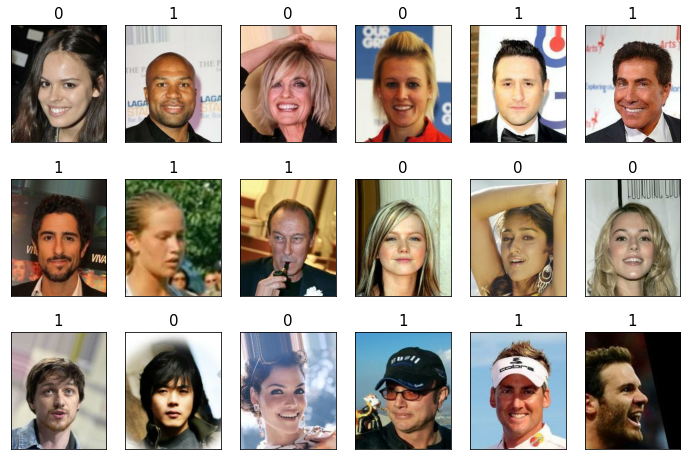

In [63]:
fig = plt.figure(figsize=(12, 8))
for i,(image,label) in enumerate(zip(images, labels)):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title('{}'.format(label), size=15)
    
# plt.savefig('images/13_3.png', dpi=300)
plt.show()

데이터셋을 로드하는 또 다른 방법입니다.

In [64]:
mnist, mnist_info = tfds.load('mnist', with_info=True,
                              shuffle_files=False)

print(mnist_info)

print(mnist.keys())

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs 

(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


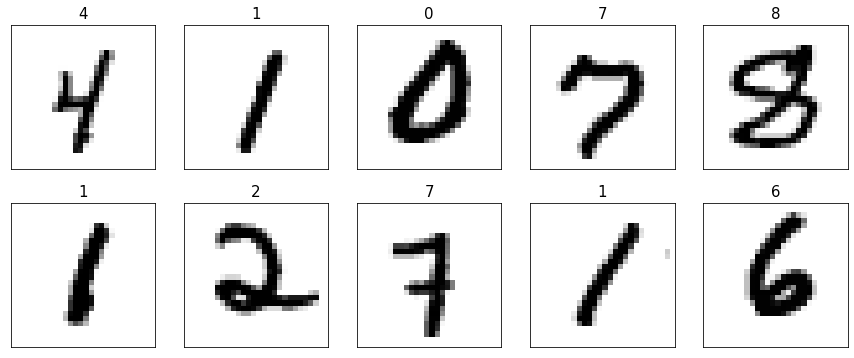

In [65]:
ds_train = mnist['train']

assert isinstance(ds_train, tf.data.Dataset)

ds_train = ds_train.map(lambda item: 
     (item['image'], item['label']))

ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(15, 6))
for i,(image,label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)

# plt.savefig('images/13_4.png', dpi=300)
plt.show()

<br>
<br>
<br>